<a href="https://colab.research.google.com/github/Pawan-kumar-Singh/Global-Terrorism/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

## **Importing Important libraries for analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Global Terrorism Analysis/Global Terrorism Data.csv',encoding="latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
df.shape

(181691, 135)

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
for i in df.columns:
  print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [9]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [10]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"ProvinceOrState","city":"City","latitude":"Latitude","longitude":"Longitude","location":"Location","summary":"Summary","attacktype1_txt":"Attack_Type","targtype1_txt":"Target_Type","gname":"Group_Name","motive":"Motive","weaptype1_txt":"Weapon_Type","nkill":"No_Of_Killed","nwound":"No_Of_Wounded","addnotes":"Add_Notes"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df.head()

,Year,Month,Day,Country,Region,ProvinceOrState,City,Latitude,Longitude,Location,Summary,Attack_Type,Target_Type,Group_Name,Motive,Weapon_Type,No_Of_Killed,No_Of_Wounded,Add_Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [13]:
df.tail()

,Year,Month,Day,Country,Region,ProvinceOrState,City,Latitude,Longitude,Location,Summary,Attack_Type,Target_Type,Group_Name,Motive,Weapon_Type,No_Of_Killed,No_Of_Wounded,Add_Notes
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,NaN
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,NaN
181690,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,NaN,12/31/2017: An explosive device was discovered...,Bombing/Explosion,Unknown,Unknown,NaN,Explosives,0.0,0.0,NaN


In [14]:
df.shape

(181691, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   ProvinceOrState  181270 non-null  object 
 6   City             181257 non-null  object 
 7   Latitude         177135 non-null  float64
 8   Longitude        177134 non-null  float64
 9   Location         55495 non-null   object 
 10  Summary          115562 non-null  object 
 11  Attack_Type      181691 non-null  object 
 12  Target_Type      181691 non-null  object 
 13  Group_Name       181691 non-null  object 
 14  Motive           50561 non-null   object 
 15  Weapon_Type      181691 non-null  object 
 16  No_Of_Killed     171378 non-null  floa

In [16]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
ProvinceOrState       421
City                  434
Latitude             4556
Longitude            4557
Location           126196
Summary             66129
Attack_Type             0
Target_Type             0
Group_Name              0
Motive             131130
Weapon_Type             0
No_Of_Killed        10313
No_Of_Wounded       16311
Add_Notes          153402
dtype: int64

In [17]:
df['No_Of_Killed']=df['No_Of_Killed'].fillna(0)
df['No_Of_Wounded']=df['No_Of_Wounded'].fillna(0)
df['Casualty']=df['No_Of_Killed']+df['No_Of_Wounded']

In [18]:
df.describe()

,Year,Month,Day,Latitude,Longitude,No_Of_Killed,No_Of_Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


## Important Observation

1. The data consists of terrorist activites ranging from the year: 1970 to 2017
2. Maximum number of people killed in  an event is: 1570
3. Maximum number of people wounded in an event is : 8191
4. Maximum number of casualty in an event were : 9574

Data Visualization

In [19]:
#number of attach in ecah year
attacks= df['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year", "Year":"Attacks"}).set_index("Year")
attacks.head(10)

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


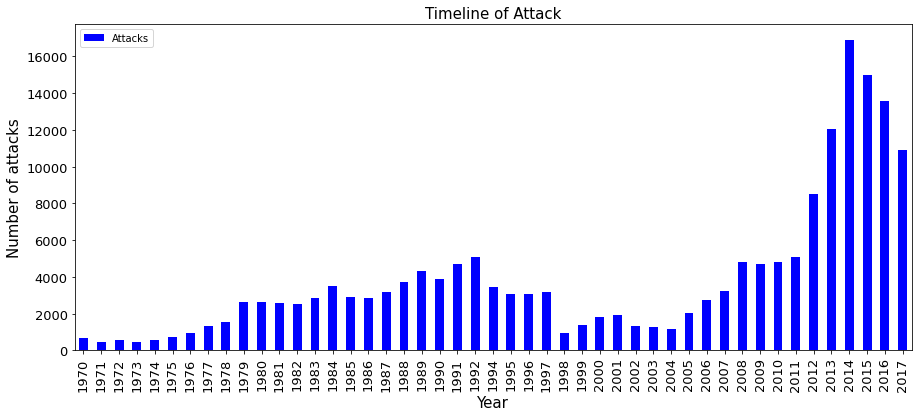

In [20]:
attacks.plot(kind="bar", color="blue",figsize=(15,6), fontsize=13)
plt.title("Timeline of Attack", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.show()

Most number of attacks(16903) in the year 2014
Least number of attacks(471) in the year 1971

In [21]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


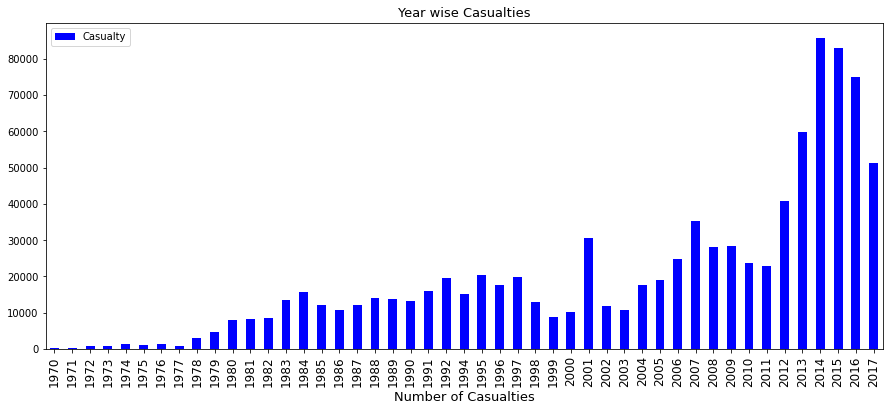

In [22]:
yc.plot(kind="bar", color="blue", figsize=(15,6))
plt.title("Year wise Casualties", fontsize=13)
plt.xlabel("Year")
plt.xticks(fontsize=12)
plt.xlabel("Number of Casualties",fontsize=13)
plt.show()

In [23]:
#Killed in each year
yk=df[["Year", "No_Of_Killed"]].groupby("Year").sum()
yk.head()

,No_Of_Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


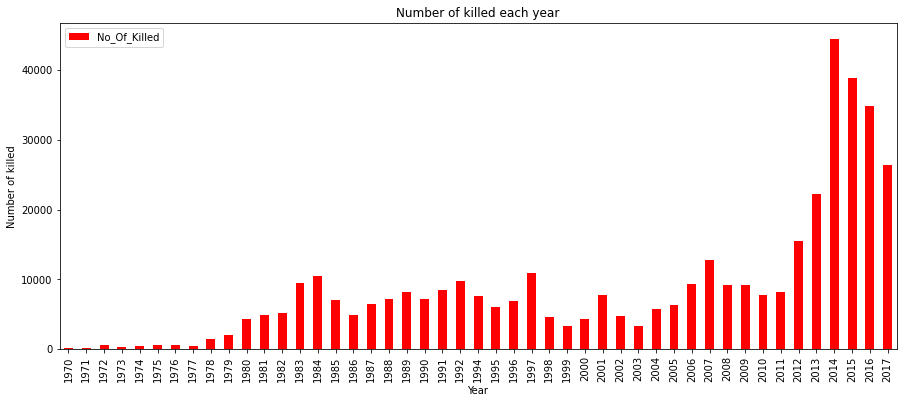

In [24]:
yk.plot(kind="bar",color="red",figsize=(15,6))
plt.title("Number of killed each year")
plt.xlabel("Year")
plt.ylabel("Number of killed")
plt.show()


In [25]:
#Wounded in each region
yw=df[["Year","No_Of_Wounded"]].groupby("Year").sum()
yw.head()

,No_Of_Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


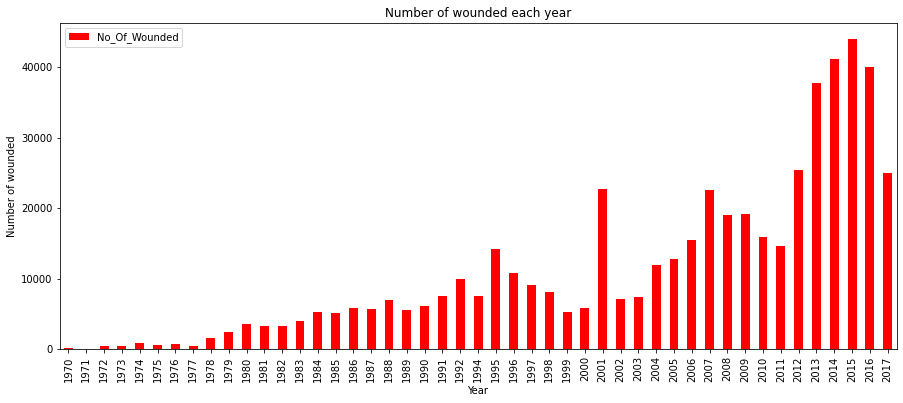

In [26]:
yw.plot(kind="bar",color="red",figsize=(15,6))
plt.title("Number of wounded each year")
plt.xlabel("Year")
plt.ylabel("Number of wounded")
plt.show()

Region wise attacks

In [27]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


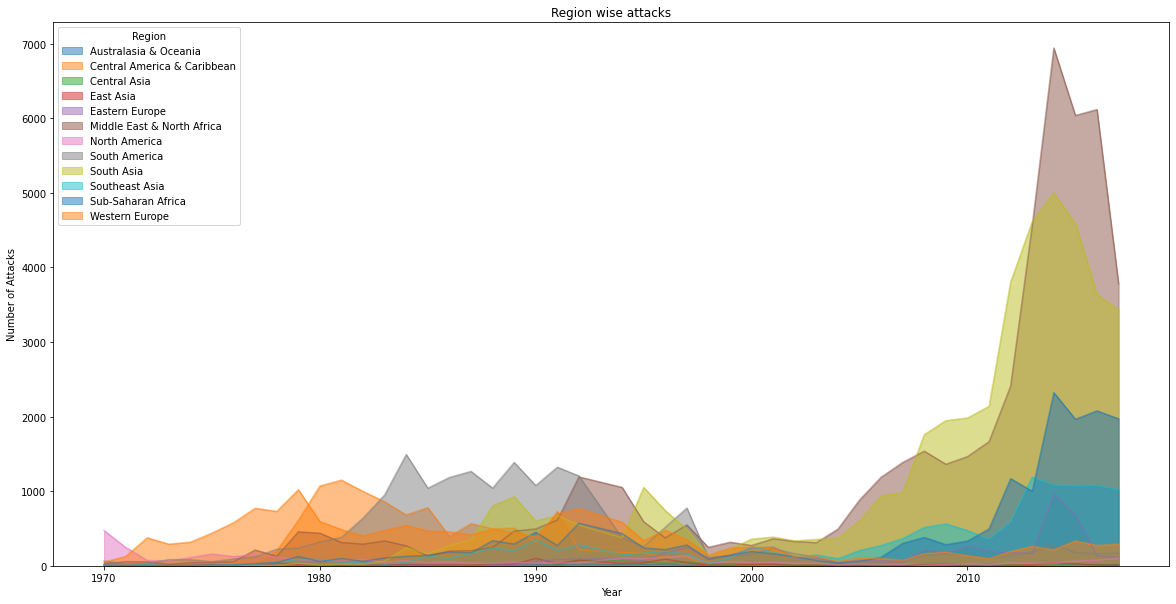

In [28]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title('Region wise attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

In [29]:
#total terrorist attack in each region from 1970-2017
regt=reg.transpose()
regt["total"]=regt.sum(axis=1)
ra=regt["total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: total, dtype: int64

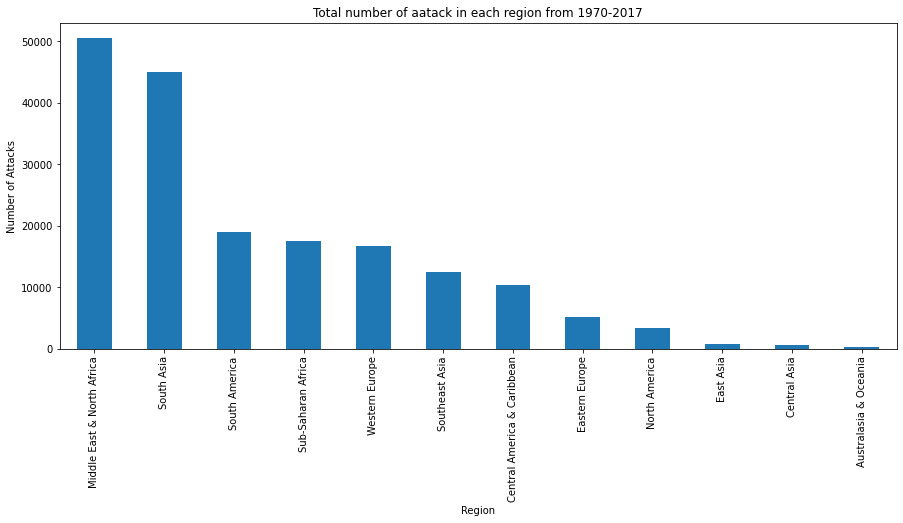

In [30]:
ra.plot(kind='bar',figsize=(15,6))
plt.title("Total number of aatack in each region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [31]:
#total casualties killed+wounded in each region
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


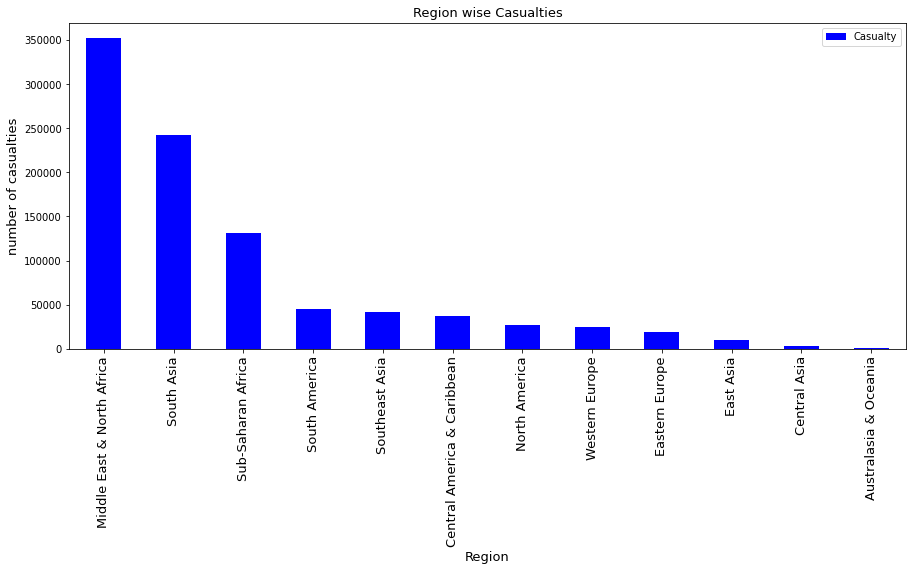

In [32]:
rc.plot(kind='bar',color='blue',figsize=(15,6))
plt.title('Region wise Casualties',fontsize=13)
plt.xlabel("Region",fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("number of casualties",fontsize=13)
plt.show()

In [34]:
rw= df[["Region","No_Of_Wounded"]].groupby("Region").sum().sort_values(by="No_Of_Wounded", ascending=False)
rw

,No_Of_Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


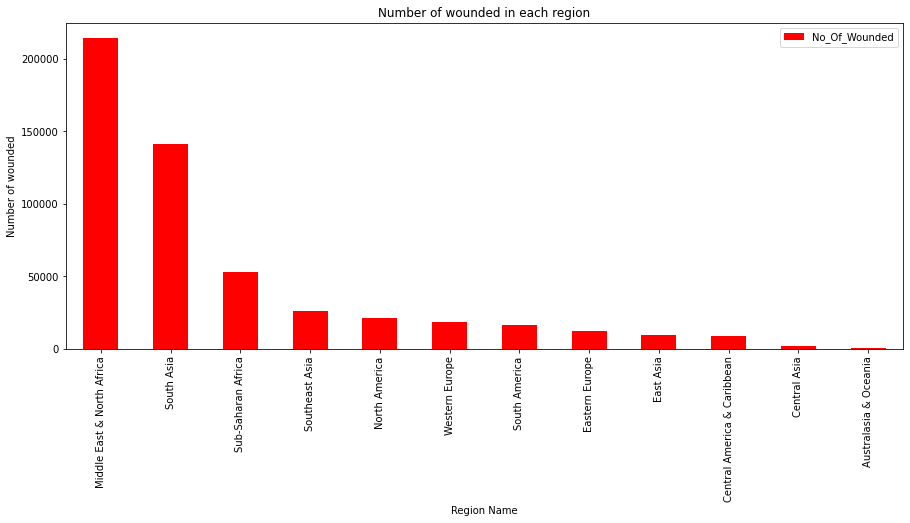

In [39]:
rw.plot(kind="bar", color="red",figsize=(15,6))
plt.title('Number of wounded in each region')
plt.xlabel("Region Name")
plt.ylabel("Number of wounded")
plt.show()


In [40]:
rk=df[["Region","No_Of_Killed"]].groupby("Region").sum().sort_values(by="No_Of_Killed", ascending=False)
rk

,No_Of_Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


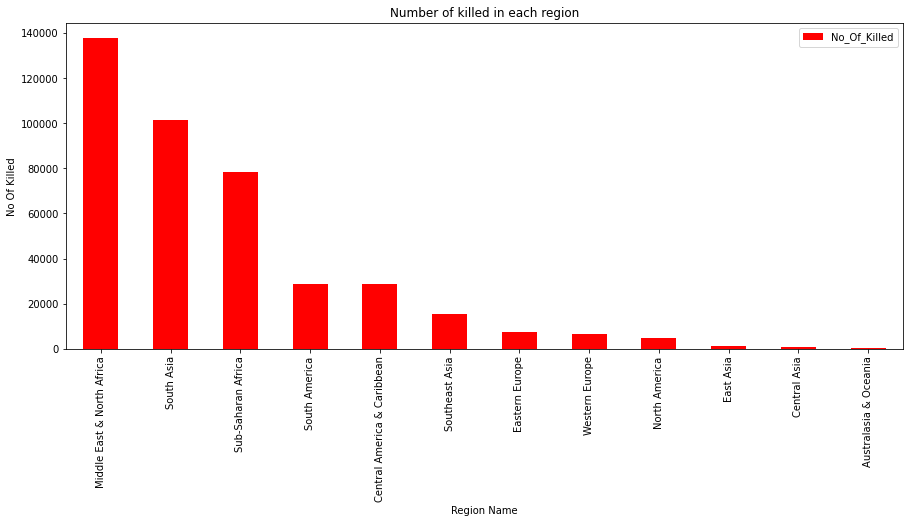

In [41]:
rk.plot(kind="bar", color='red', figsize=(15,6))
plt.title('Number of killed in each region')
plt.xlabel('Region Name')
plt.ylabel('No Of Killed')
plt.show()

Country wise attack

In [44]:
country_Attack = df["Country"].value_counts().head(10)
country_Attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

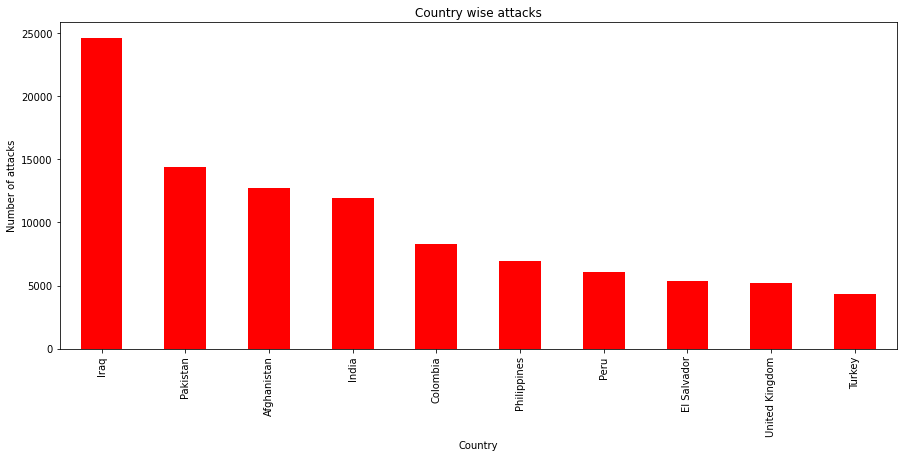

In [45]:
country_Attack.plot(kind='bar',color='red',figsize=(15,6))
plt.title("Country wise attacks")
plt.xlabel('Country')
plt.ylabel("Number of attacks")
plt.show()


In [49]:
#total casualties(killed + Wounded) in each country
country_Casualties = df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False).head(10)
country_Casualties

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


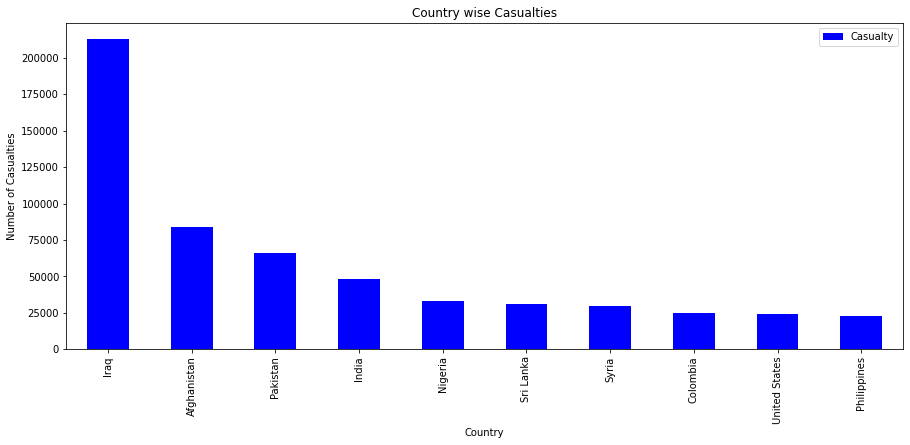

In [50]:
country_Casualties.plot(kind='bar',color='blue',figsize=(15,6))
plt.title("Country wise Casualties")
plt.xlabel('Country')
plt.ylabel("Number of Casualties")
plt.show()


In [56]:
country_Killed=df[["Country","No_Of_Killed"]].groupby("Country").sum().sort_values(by="No_Of_Killed", ascending=False).head(10)
country_Killed

,No_Of_Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


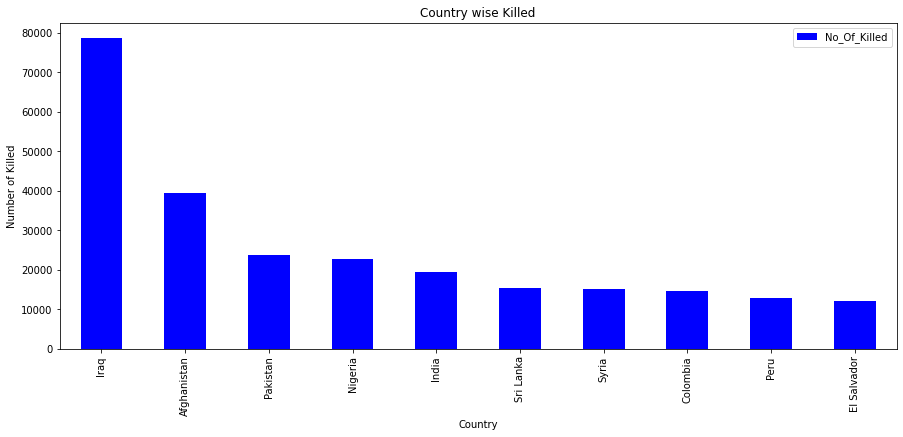

In [57]:
country_Killed.plot(kind='bar',color='blue',figsize=(15,6))
plt.title("Country wise Killed")
plt.xlabel('Country')
plt.ylabel("Number of Killed")
plt.show()


In [59]:
#City wise attacks
city_Attacks =  df["City"].value_counts()[1:11]
city_Attacks

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

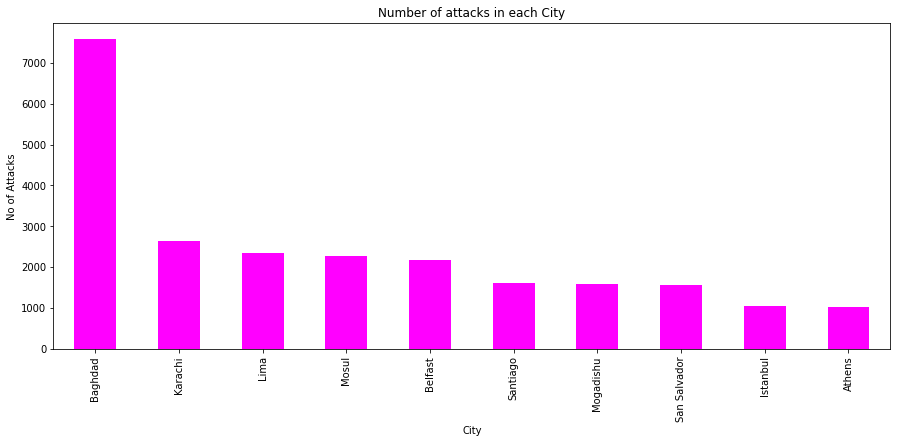

In [65]:
city_Attacks.plot(kind="bar", color="magenta", figsize=(15,6))
plt.title('Number of attacks in each City')
plt.xlabel("City")
plt.ylabel("No of Attacks")
plt.show()

In [69]:
city_Casualties = df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty", ascending=False).drop("Unknown")[1:11]
city_Casualties

,Casualty
City,
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0
Aleppo,5748.0


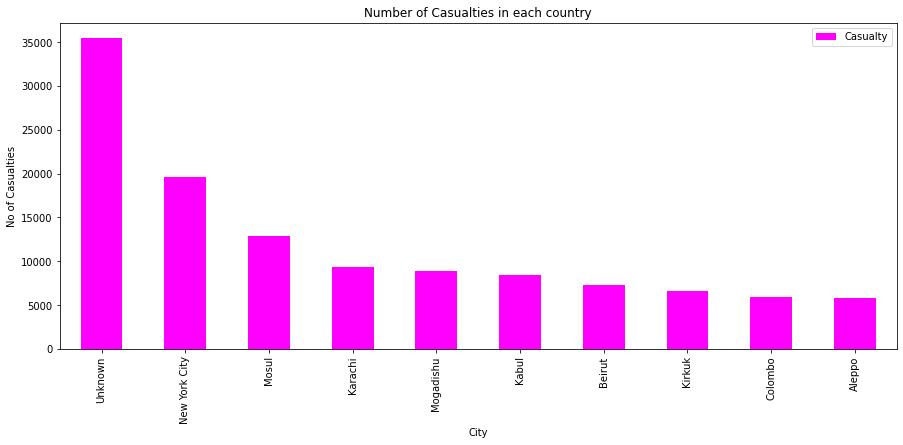

In [67]:
city_Casualties.plot(kind="bar", color="magenta", figsize=(15,6))
plt.title('Number of Casualties in each country')
plt.xlabel("City")
plt.ylabel("No of Casualties")
plt.show()

In [72]:
city_Wounded = df[["City","No_Of_Wounded"]].groupby("City").sum().sort_values(by="No_Of_Wounded", ascending=False).drop("Unknown")[1:11]
city_Wounded

,No_Of_Wounded
City,
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0
Mogadishu,4955.0


In [70]:
city_Killed = df[["City","No_Of_Killed"]].groupby("City").sum().sort_values(by="No_Of_Killed", ascending=False).drop("Unknown")[1:11]
city_Killed

,No_Of_Killed
City,
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0
Aleppo,2125.0


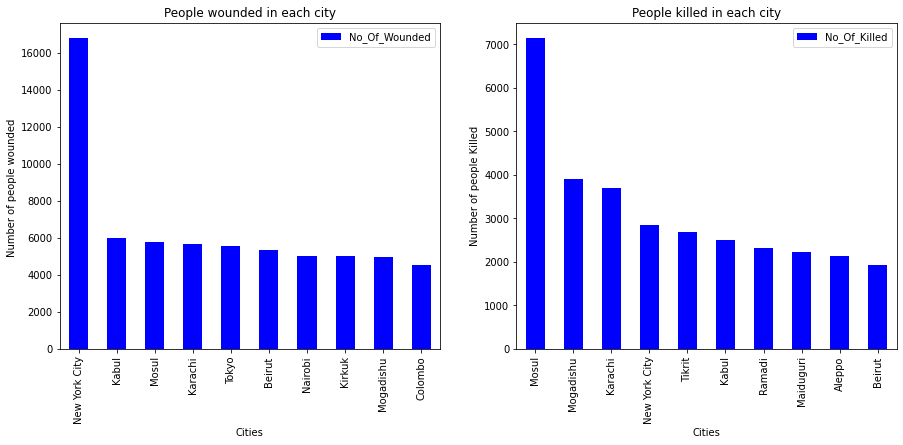

In [73]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#wounded
city_Wounded.plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("People wounded in each city")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of people wounded ")

#Killed
city_Killed.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People killed in each city")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of people Killed")

plt.show()

Terrorist Group wise Attacks

Number of attacks by each group

In [74]:
terror_grp_attack = df['Group_Name'].value_counts()[1:11]
terror_grp_attack

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group_Name, dtype: int64

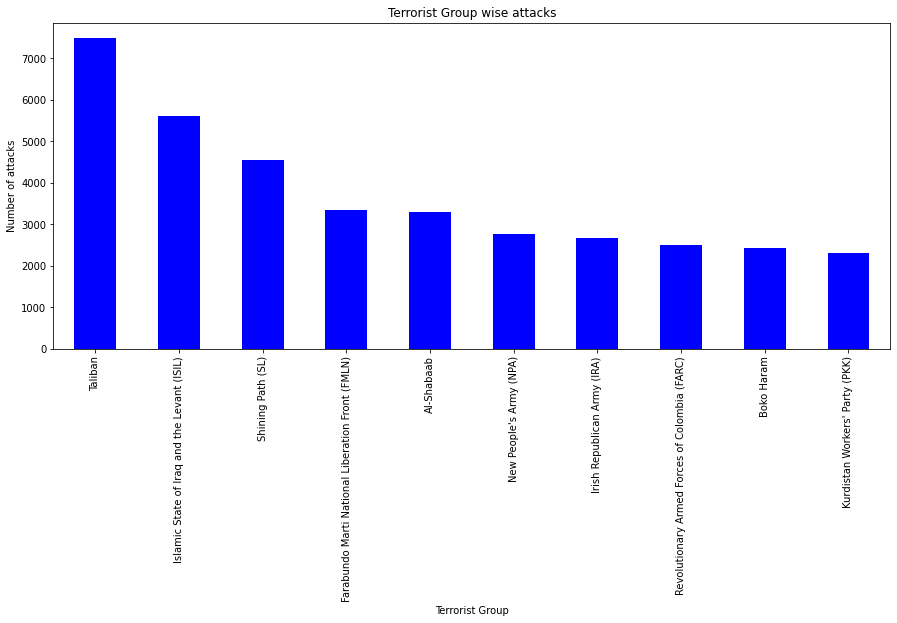

In [76]:
terror_grp_attack.plot(kind="bar", color="blue",figsize=(15,6))
plt.title("Terrorist Group wise attacks")
plt.xlabel("Terrorist Group")
plt.ylabel("Number of attacks")
plt.show()

Casualties by Terrorist Group

In [77]:
terror_grp_casualties = df[["Group_Name","Casualty"]].groupby("Group_Name").sum().sort_values(by="Casualty", ascending=False)[1:11]
terror_grp_casualties

,Casualty
Group_Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


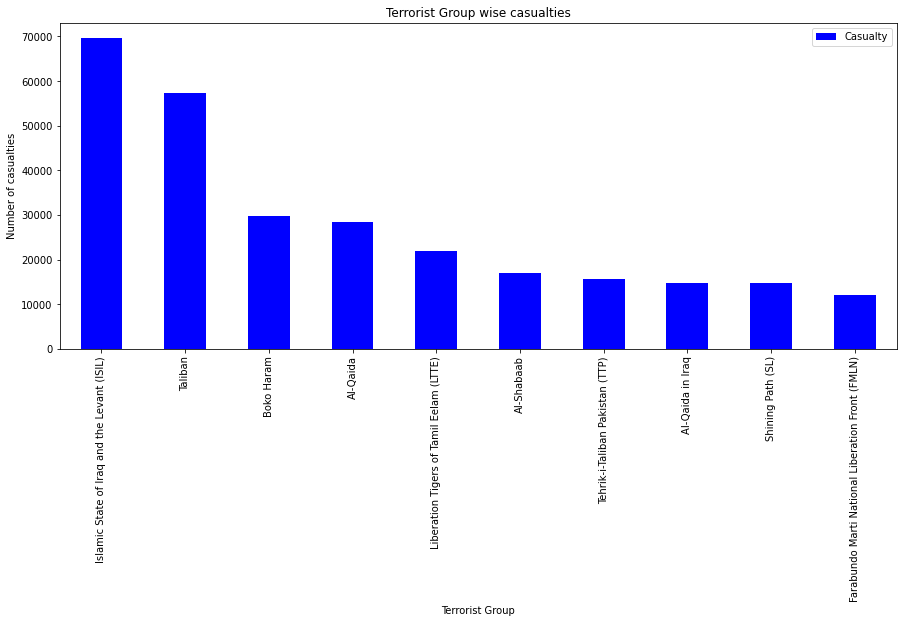

In [78]:
terror_grp_casualties.plot(kind="bar", color="blue",figsize=(15,6))
plt.title("Terrorist Group wise casualties")
plt.xlabel("Terrorist Group")
plt.ylabel("Number of casualties")
plt.show()

In [80]:
terror_grp_wounded = df[["Group_Name","No_Of_Wounded"]].groupby("Group_Name").sum().sort_values(by="No_Of_Wounded", ascending=False)[1:11]
terror_grp_wounded

,No_Of_Wounded
Group_Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


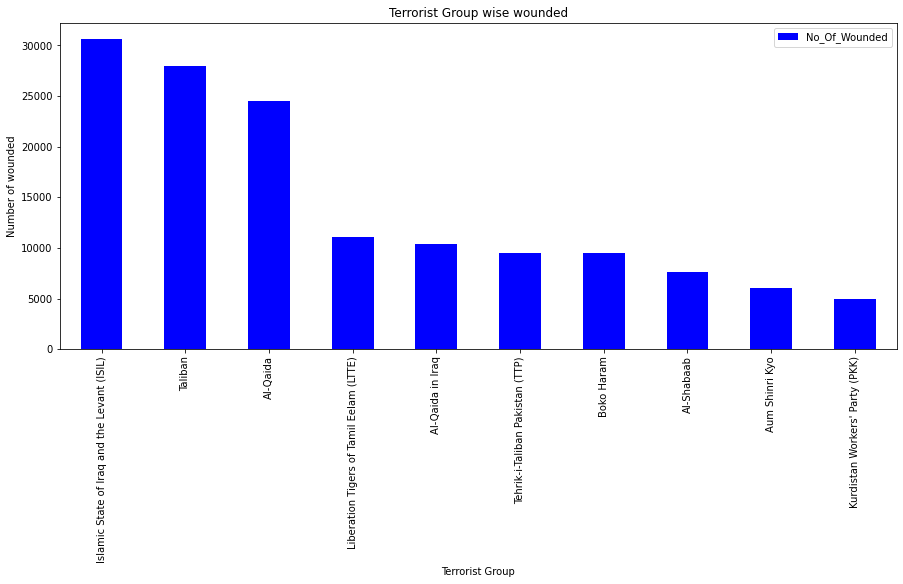

In [81]:
terror_grp_wounded.plot(kind="bar", color="blue",figsize=(15,6))
plt.title("Terrorist Group wise wounded")
plt.xlabel("Terrorist Group")
plt.ylabel("Number of wounded")
plt.show()

In [82]:
terror_grp_Killed = df[["Group_Name","No_Of_Killed"]].groupby("Group_Name").sum().sort_values(by="No_Of_Killed", ascending=False)[1:11]
terror_grp_Killed

,No_Of_Killed
Group_Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


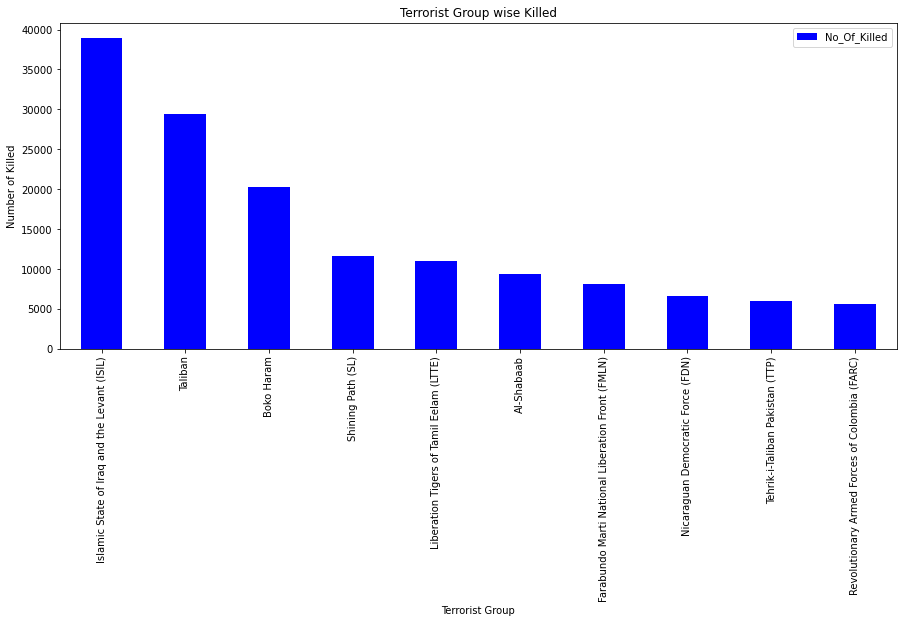

In [83]:
terror_grp_wounded.plot(kind="bar", color="blue",figsize=(15,6))
plt.title("Terrorist Group wise wounded")
plt.xlabel("Terrorist Group")
plt.ylabel("Number of wounded")
plt.show()

In [85]:
#Attack type
attack_type = df["Attack_Type"].value_counts()
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

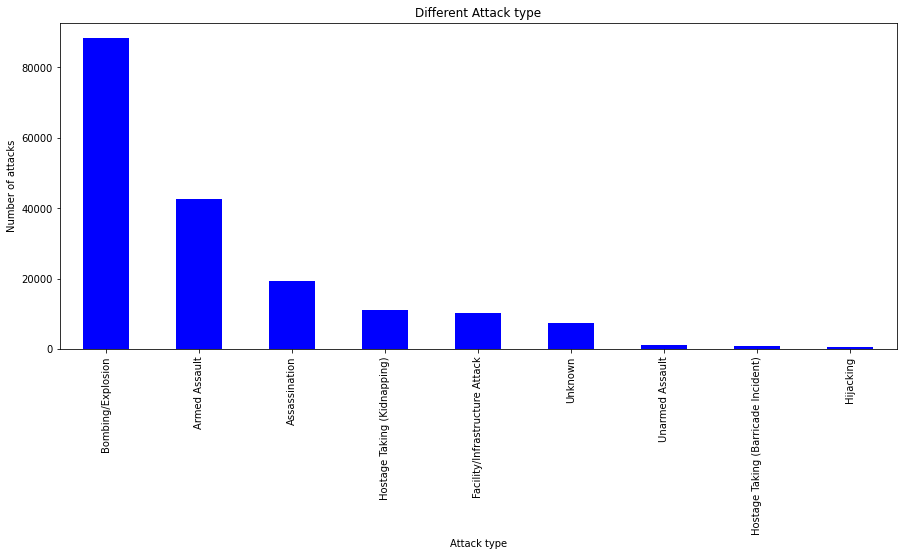

In [86]:
attack_type.plot(kind="bar", color="blue",figsize=(15,6))
plt.title("Different Attack type")
plt.xlabel("Attack type")
plt.ylabel("Number of attacks")
plt.show()

In [88]:
#Attack type casulaties
attack_Type_Casualties = df[["Attack_Type","Casualty"]].groupby("Attack_Type").sum().sort_values(by="Casualty", ascending=False)
attack_Type_Casualties

,Casualty
Attack_Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


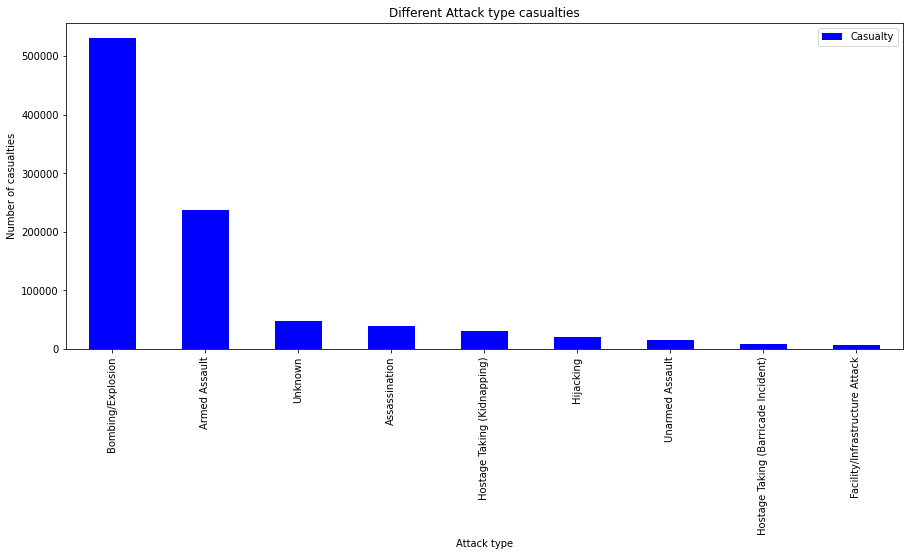

In [89]:
attack_Type_Casualties.plot(kind="bar", color="blue",figsize=(15,6))
plt.title("Different Attack type casualties")
plt.xlabel("Attack type")
plt.ylabel("Number of casualties")
plt.show()

In [90]:
#killed by attack type

In [93]:
killed_attack_type = df[["Attack_Type","No_Of_Killed"]].groupby("Attack_Type").sum().sort_values(by="No_Of_Killed",ascending=False)
killed_attack_type

,No_Of_Killed
Attack_Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


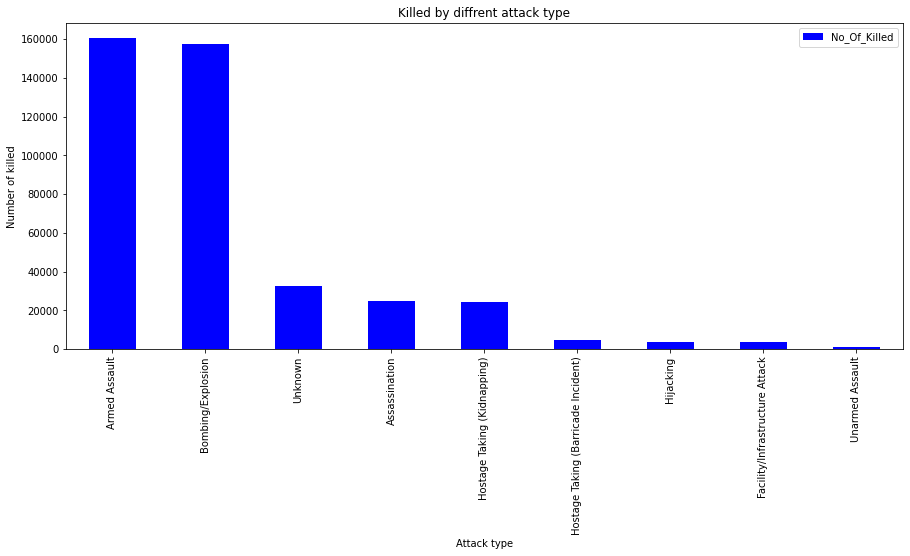

In [94]:
killed_attack_type.plot(kind="bar", color="blue",figsize=(15,6))
plt.title("Killed by diffrent attack type")
plt.xlabel("Attack type")
plt.ylabel("Number of killed")
plt.show()

In [96]:
#Target Type with Attacks
target_Attack_Type = df["Target_Type"].value_counts()
target_Attack_Type

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_Type, dtype: int64

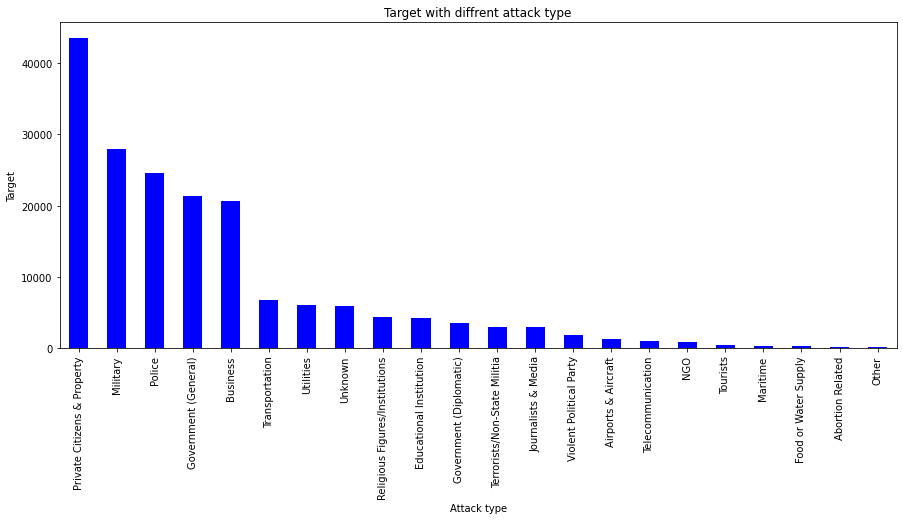

In [97]:
target_Attack_Type.plot(kind="bar", color="blue",figsize=(15,6))
plt.title("Target with diffrent attack type")
plt.xlabel("Attack type")
plt.ylabel("Target")
plt.show()

In [ ]:
#Target type with casualties


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   ProvinceOrState  181270 non-null  object 
 6   City             181257 non-null  object 
 7   Latitude         177135 non-null  float64
 8   Longitude        177134 non-null  float64
 9   Location         55495 non-null   object 
 10  Summary          115562 non-null  object 
 11  Attack_Type      181691 non-null  object 
 12  Target_Type      181691 non-null  object 
 13  Group_Name       181691 non-null  object 
 14  Motive           50561 non-null   object 
 15  Weapon_Type      181691 non-null  object 
 16  No_Of_Killed     181691 non-null  floa